In [1]:
pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 48.6 MB/s eta 0:00:00


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import dmba
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
wine_data = pd.read_csv('wine.csv')
wine_data.shape

(178, 13)

In [9]:
# Scale and preprocess the data
scale = StandardScaler()
scaled_data = scale.fit_transform(wine_data)


In [21]:
pcs = PCA(n_components=9)
pcs1 = pcs.fit(scaled_data)

In [ ]:
# a. How many principal components do you think could appropriately
# explain the variability of the data? How much variation do they explain in total?

#By Increasing the number of principal components from 2 to 9, the variability of data increases from 36% to 94%


In [22]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs1.explained_variance_),
                           'Proportion of variance': pcs1.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs1.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9']
pcsSummary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Standard deviation,2.1754,1.5846,1.2059,0.9613,0.9263,0.8033,0.7444,0.5920,0.5390
Proportion of variance,0.3620,0.1921,0.1112,0.0707,0.0656,0.0494,0.0424,0.0268,0.0222
Cumulative proportion,0.3620,0.5541,0.6653,0.7360,0.8016,0.8510,0.8934,0.9202,0.9424


In [23]:
# b. Write the formula (the relation with the independent variables) for the first principal component.
loadings = pcs.components_[0]


formula = "PC1 = "
for i, loading in enumerate(loadings):
  formula += f"{loading:.3f} * X{i+1} + "


formula = formula[:-3]

print(formula)

PC1 = 0.144 * X1 + -0.245 * X2 + -0.002 * X3 + -0.239 * X4 + 0.142 * X5 + 0.395 * X6 + 0.423 * X7 + -0.299 * X8 + 0.313 * X9 + -0.089 * X10 + 0.297 * X11 + 0.376 * X12 + 0.287 * X13


In [26]:
# 2- Run hierarchical clustering; how many clusters could you find? Could you report the clusters and their members?
# consider number cluster as 6

scaled_data_clusters = pd.DataFrame(scaled_data, columns = wine_data.columns)
scaled_data_clusters.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


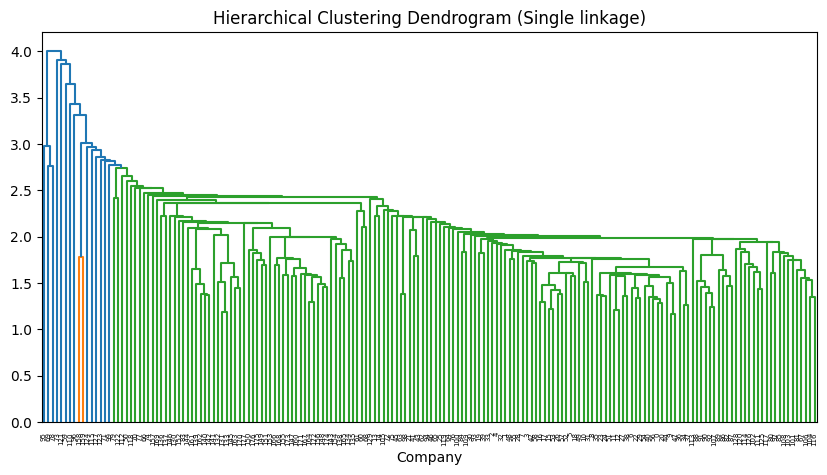

In [36]:
Z = linkage(scaled_data_clusters, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=scaled_data_clusters.index, color_threshold=2.75)
plt.show()

In [37]:
memb = fcluster(linkage(scaled_data_clusters, 'single'), 6, criterion='maxclust')

In [38]:
memb

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 6, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [39]:
memb = pd.Series(memb, index=scaled_data_clusters.index)

In [40]:
memb

,0
0,2
1,2
2,2
3,2
4,2
...,...
173,2
174,2
175,2
176,2


In [41]:
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index.astype(str)))

1 :  69, 78, 95
2 :  0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177
3 :  110
4 :  59
5 :  121
6 :  73


In [44]:
memb = fcluster(linkage(scaled_data_clusters, 'average'), 6, criterion='maxclust')
memb = pd.Series(memb, index=scaled_data_clusters.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index.astype(str)))

1 :  25, 73, 121
2 :  69, 78, 95, 96
3 :  60, 61, 68, 70, 77, 83, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177
4 :  110, 123, 124
5 :  0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63, 64, 65, 66, 67, 71, 72, 74, 75, 76, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 125, 126, 127, 128, 129
6 :  59


In [52]:
# 3- Now, find the optimal clustering number for the K-means clustering.
# How many clusters would be optimal? Why? Could you report the clusters and their members?
# K-MEANS
# Normalized distance
#utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)

kmeans = KMeans(n_clusters=9, random_state=0).fit(scaled_data_clusters)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=scaled_data_clusters.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index.astype(str)))

0 :  148, 149, 153, 155, 156, 157, 158, 159, 164, 166, 167, 168, 169, 172, 173, 174, 175, 176, 177
1 :  60, 64, 77, 82, 86, 87, 88, 89, 90, 91, 92, 105, 107, 112, 113, 114, 115, 127
2 :  0, 19, 20, 39, 40, 44, 54, 55, 56, 69, 78, 95
3 :  43, 79, 84, 93, 99, 102, 109, 110, 111, 119, 120, 122, 123, 124, 125, 126, 128, 129
4 :  4, 7, 16, 17, 21, 24, 25, 28, 30, 33, 34, 35, 36, 45, 71, 73, 121
5 :  38, 59, 62, 63, 65, 66, 67, 72, 74, 75, 76, 80, 81, 85, 94, 97, 98, 100, 101, 103, 104, 106, 108, 116, 117
6 :  61, 68, 83, 118, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 154, 160, 161, 162, 163, 165, 170, 171
7 :  1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 18, 22, 23, 26, 27, 29, 31, 32, 37, 41, 42, 46, 47, 48, 49, 50, 51, 52, 53, 57, 58
8 :  70, 96, 130, 131, 132, 133, 144, 150, 151, 152


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

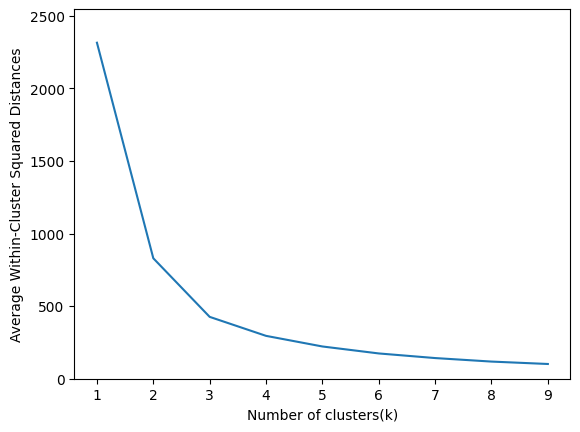

In [56]:
inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(scaled_data_clusters)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [57]:
# # K-MEANS value optimal calculation
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(scaled_data_clusters)

# reduce to the minimum squared distance of each data point to the cluster centers
minSquaredDistances = distances.min(axis=1) ** 2

# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_},
    index=scaled_data_clusters.index)

# Group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')

Cluster 0 (19 members): 89.43 within cluster 
Cluster 1 (18 members): 88.71 within cluster 
Cluster 2 (12 members): 74.19 within cluster 
Cluster 3 (18 members): 107.39 within cluster 
Cluster 4 (17 members): 108.80 within cluster 
Cluster 5 (25 members): 129.53 within cluster 
Cluster 6 (25 members): 123.58 within cluster 
Cluster 7 (34 members): 141.53 within cluster 
Cluster 8 (10 members): 50.04 within cluster 


In [58]:
print(pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_, metric='euclidean')))

          0         1         2         3         4         5         6  \
0  0.000000  4.731548  5.648966  4.905816  5.048570  5.367592  2.305700   
1  4.731548  0.000000  5.085908  2.839208  4.070299  2.732024  3.330383   
2  5.648966  5.085908  0.000000  3.877884  2.774728  3.786429  5.637735   
3  4.905816  2.839208  3.877884  0.000000  3.504712  2.512275  4.138760   
4  5.048570  4.070299  2.774728  3.504712  0.000000  3.976570  5.013942   
5  5.367592  2.732024  3.786429  2.512275  3.976570  0.000000  4.274274   
6  2.305700  3.330383  5.637735  4.138760  5.013942  4.274274  0.000000   
7  5.478371  4.950068  2.377523  4.057608  2.452934  3.793128  5.473792   
8  2.983581  4.125564  4.836327  4.256544  4.608576  4.284156  2.823298   

          7         8  
0  5.478371  2.983581  
1  4.950068  4.125564  
2  2.377523  4.836327  
3  4.057608  4.256544  
4  2.452934  4.608576  
5  3.793128  4.284156  
6  5.473792  2.823298  
7  0.000000  5.251310  
8  5.251310  0.000000  
